
Importing the Dependencies

In [98]:
pip install catboost

In [99]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import metrics

# ML model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

Data Collection and Processing

In [100]:
# loading the dataset to pandas DataFrame
crop_reco_dataset = pd.read_csv('/content/Crop_recommendation.csv')

In [101]:
type(crop_reco_dataset)

pandas.core.frame.DataFrame

In [102]:
# first 5 rows of the dataframe
crop_reco_dataset.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [103]:
# last 5 rows of the dataframe
crop_reco_dataset.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2363,8,3,0,14.131797,47.225123,4.362608,103.326000,coffee
2364,7,2,4,6.272418,2.127394,4.758793,20.175293,coffee
2365,4,0,3,3.603016,0.396475,4.779833,10.937041,coffee
2366,7,2,0,6.272418,2.127394,4.758793,67.175293,coffee
2367,0,8,3,3.603016,0.396475,4.779833,80.937042,coffee


In [104]:
# number of rows and columns
crop_reco_dataset.shape

(2368, 8)

In [105]:
# the name of the columns of dataframe
crop_reco_dataset.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [106]:
# Describe the data
crop_reco_dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000
mean,50.038851,53.021537,47.321791,25.274168,69.816349,6.454858,103.943457
std,36.186313,32.135367,49.226612,5.258639,23.334729,0.791479,55.414013
min,0.000000,0.000000,0.000000,0.730444,0.396475,3.504752,10.937041
25%,21.000000,29.000000,20.000000,22.291200,57.788607,5.949547,65.703596
50%,37.000000,51.000000,32.000000,25.359270,79.429688,6.417256,94.019735
75%,83.000000,67.000000,49.000000,28.349748,89.017126,6.923643,122.661662
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [107]:
# Describe the data with transpose
crop_reco_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2368.0,50.038851,36.186313,0.000000,21.000000,37.000000,83.000000,140.000000
P,2368.0,53.021537,32.135367,0.000000,29.000000,51.000000,67.000000,145.000000
K,2368.0,47.321791,49.226612,0.000000,20.000000,32.000000,49.000000,205.000000
temperature,2368.0,25.274168,5.258639,0.730444,22.291200,25.359270,28.349748,43.675493
humidity,2368.0,69.816349,23.334729,0.396475,57.788607,79.429688,89.017126,99.981876
ph,2368.0,6.454858,0.791479,3.504752,5.949547,6.417256,6.923643,9.935091
rainfall,2368.0,103.943457,55.414013,10.937041,65.703596,94.019735,122.661662,298.560117


In [108]:
# getting imformation about dataset
crop_reco_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2368 non-null   int64  
 1   P            2368 non-null   int64  
 2   K            2368 non-null   int64  
 3   temperature  2368 non-null   float64
 4   humidity     2368 non-null   float64
 5   ph           2368 non-null   float64
 6   rainfall     2368 non-null   float64
 7   label        2368 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 148.1+ KB


In [109]:
# number of missing values in each column
crop_reco_dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

No missing values or null values in this dataframe,
For null values we have to replace or mean or median or delete

replacing the null values with mean of single column,
1. crop_reco_dataset['col_name'].fillna(crop_reco_dataset.col_name.mean(), inplace=True)

Data Visualization

Pairplot for Crop Recommendation Dataset


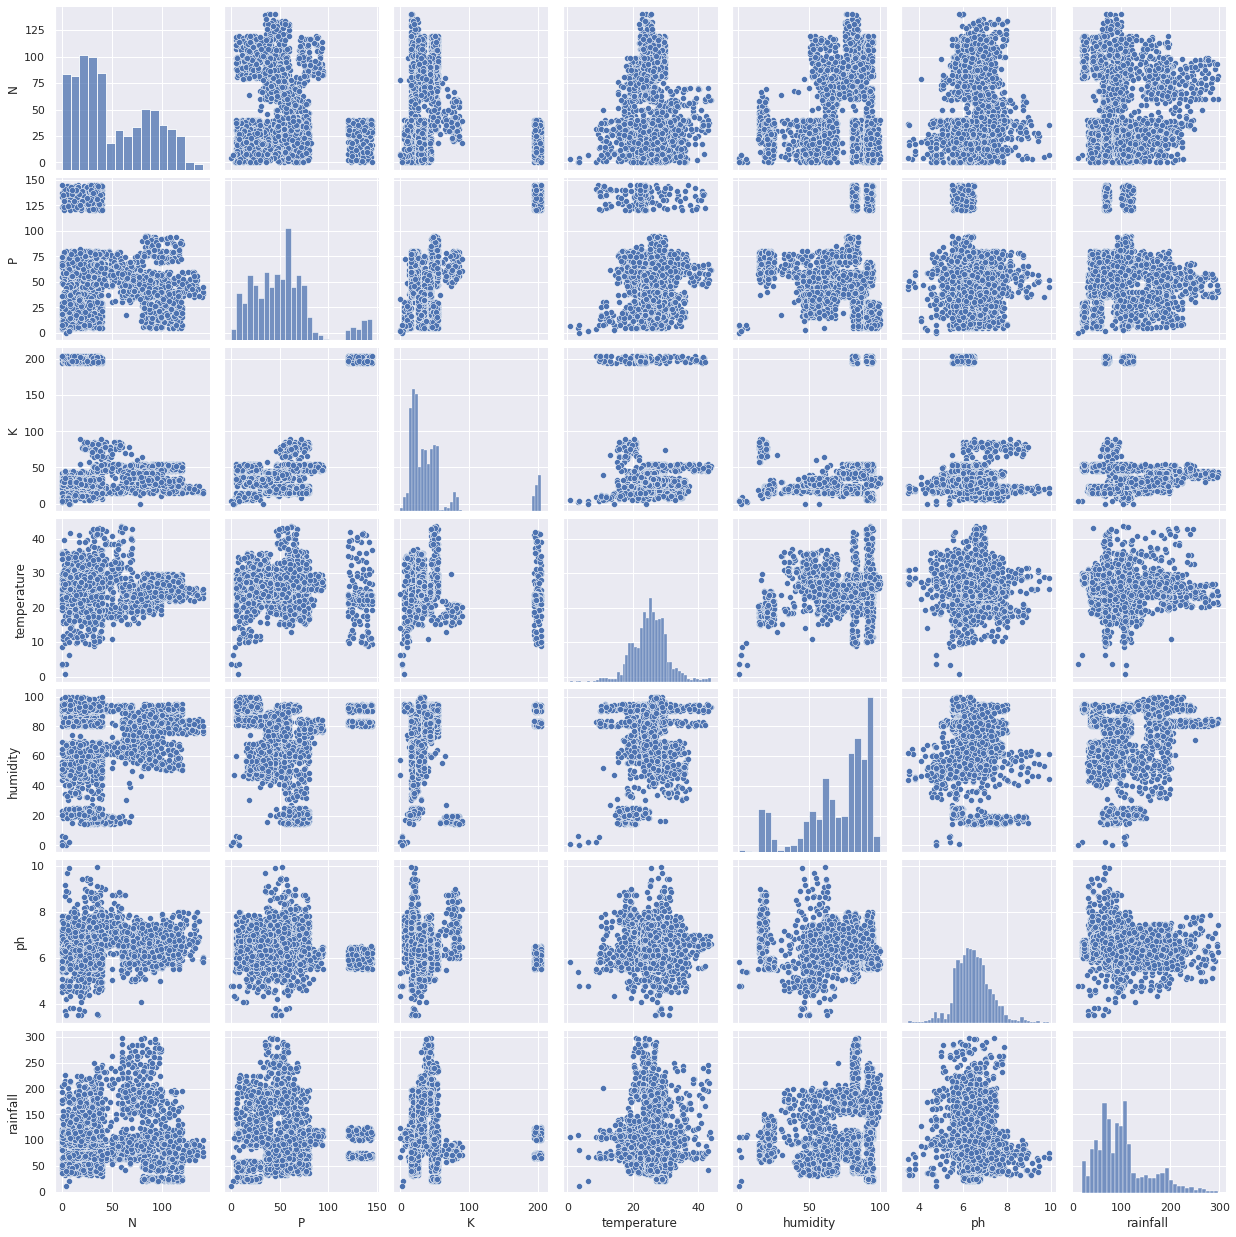

In [110]:
# pairplot for Crop Recommendation Dataset
sns.pairplot(crop_reco_dataset)
print('Pairplot for Crop Recommendation Dataset')

Histplot in Crop Recommendation Dataset


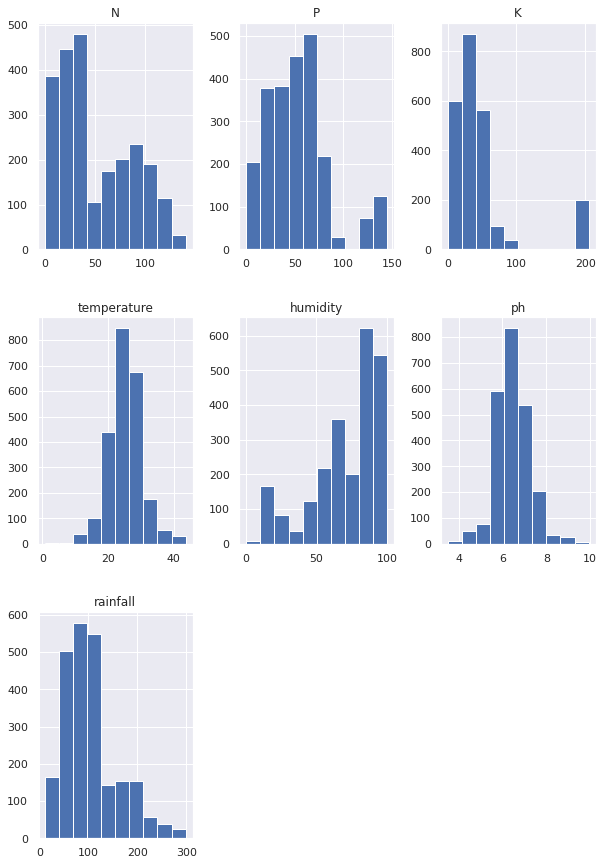

In [111]:
sns.set(style="darkgrid") # hide graph line
crop_reco_dataset.hist(figsize=(10,15))
print('Histplot in Crop Recommendation Dataset')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



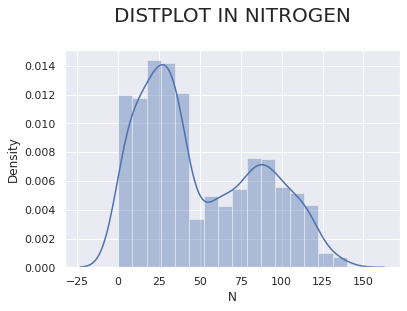

In [112]:
# Nitrogen
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['N'])
title = 'Distplot in Nitrogen\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



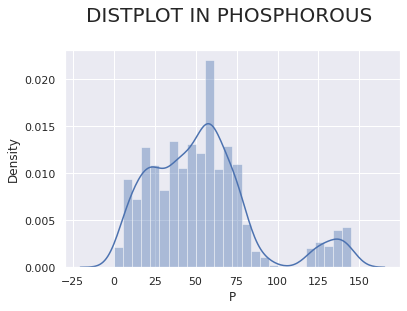

In [113]:
# Phosphorous 
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['P'])
title = 'Distplot in Phosphorous \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



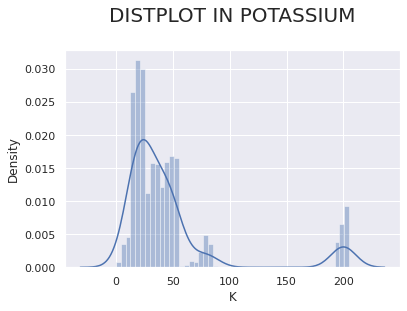

In [114]:
# Potassium 
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['K'])
title = 'Distplot in Potassium\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



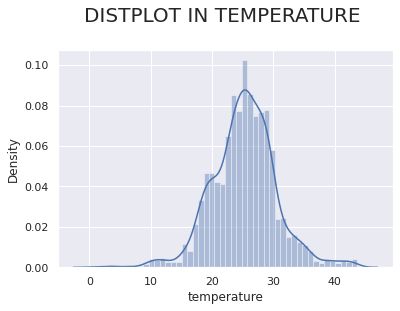

In [115]:
# temperature 
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['temperature'])
title = 'Distplot in Temperature \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



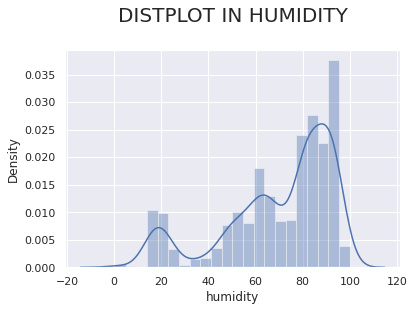

In [116]:
# humidity
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['humidity'])
title = 'Distplot in Humidity\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



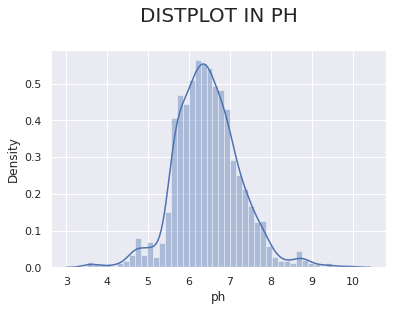

In [117]:
# ph
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['ph'])
title = 'Distplot in Ph\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



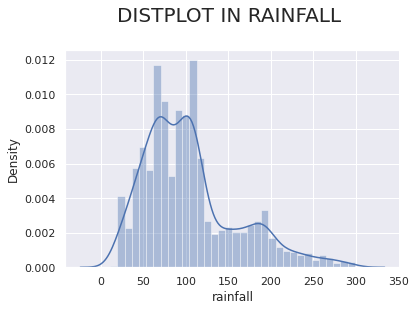

In [118]:
# rainfall 
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['rainfall'])
title = 'Distplot in Rainfall \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [119]:
plt.figure(figsize=(100,4))
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_reco_dataset.index,
    y=crop_reco_dataset['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_reco_dataset.index,
    y=crop_reco_dataset['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_reco_dataset.index,
    y=crop_reco_dataset['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='black',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

<Figure size 7200x288 with 0 Axes>

In [120]:
# labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
# fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
#                                             {'type':'domain'}, {'type':'domain'}, 
#                                             {'type':'domain'}]])

# rice_npk = crop_reco_dataset[crop_reco_dataset.index=='rice']
# values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
# fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

# cotton_npk = crop_reco_dataset[crop_reco_dataset.index=='cotton']
# values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
# fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton"),1, 2)

# jute_npk = crop_reco_dataset[crop_reco_dataset.index=='jute']
# values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
# fig.add_trace(go.Pie(labels=labels, values=values,name="Jute"),1, 3)

# maize_npk = crop_reco_dataset[crop_reco_dataset.index=='maize']
# values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
# fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)

# lentil_npk = crop_reco_dataset[crop_reco_dataset.index=='lentil']
# values = [lentil_npk['N'][0], lentil_npk['P'][0], lentil_npk['K'][0]]
# fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil"),1, 5)

# fig.update_traces(hole=.4, hoverinfo="label+percent+name")
# fig.update_layout(
#     title_text="NPK ratio for rice, cotton, jute, maize, lentil",
#     annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=15, showarrow=False),
#                  dict(text='Cotton',x=0.26,y=0.8, font_size=15, showarrow=False),
#                  dict(text='Jute',x=0.50,y=0.8, font_size=15, showarrow=False),
#                  dict(text='Maize',x=0.74,y=0.8, font_size=15, showarrow=False),
#                 dict(text='Lentil',x=0.94,y=0.8, font_size=15, showarrow=False)])
# fig.show()

Text(0.5, 1.0, 'Temperature vs Humidity of Crop Dataset')

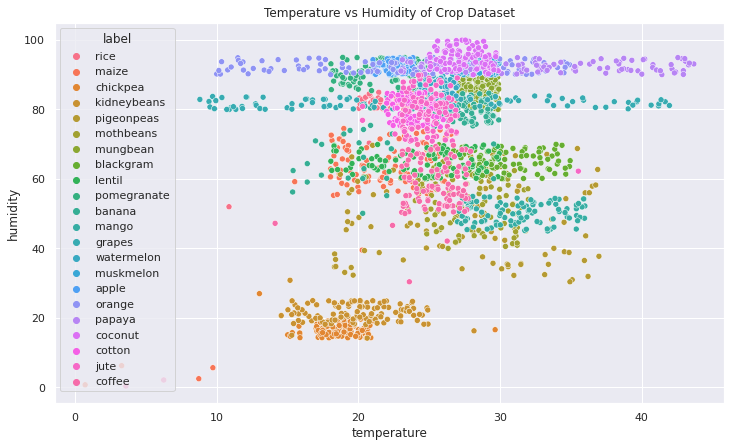

In [121]:
plt.figure(figsize=(12,7))
axis = sns.scatterplot(x='temperature', y='humidity', data=crop_reco_dataset, hue='label')
plt.title('Temperature vs Humidity of Crop Dataset')

Text(0.5, 1.0, 'Temperature vs Rainfall of Crop Dataset')

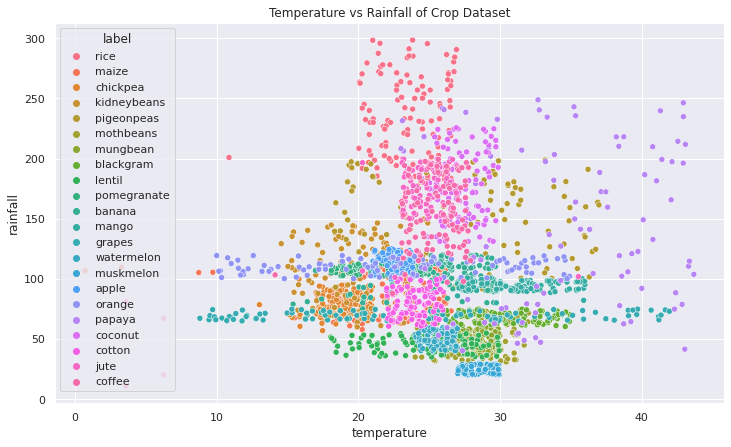

In [122]:
plt.figure(figsize=(12,7))
axis = sns.scatterplot(x='temperature', y='rainfall', data=crop_reco_dataset, hue='label')
plt.title('Temperature vs Rainfall of Crop Dataset')

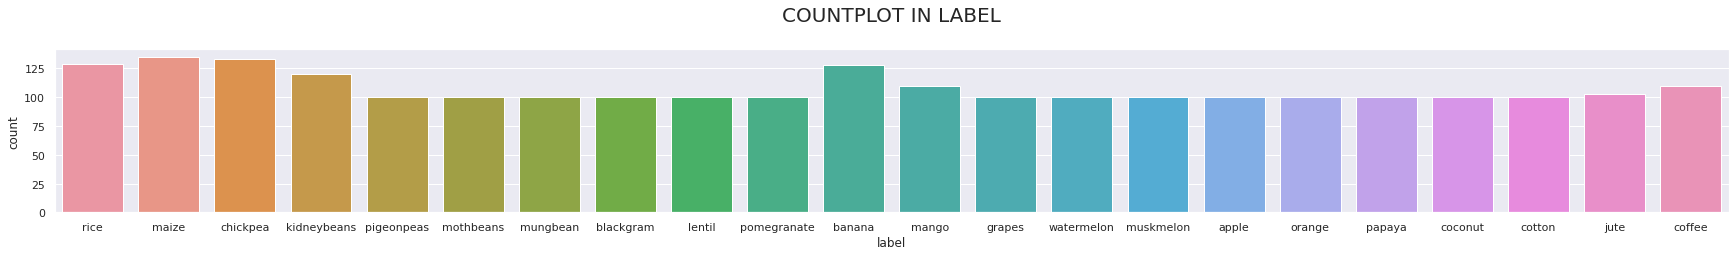

In [123]:
# label
plt.figure(figsize=(30,3))
sns.countplot(x='label', data=crop_reco_dataset)
title = 'CountPlot in label\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [124]:
crop_scatter = crop_reco_dataset[(crop_reco_dataset['label']=='rice') | 
                      (crop_reco_dataset['label']=='jute') | 
                      (crop_reco_dataset['label']=='cotton')|
                     (crop_reco_dataset['label']=='maize') |
                     (crop_reco_dataset['label']=='lentil')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Understanding the correlation between various features in the dataset

In [125]:
correlation = crop_reco_dataset.corr()

In [126]:
print(correlation)

                    N         P         K  ...  humidity        ph  rainfall
N            1.000000 -0.211557 -0.131603  ...  0.217396  0.104574  0.065374
P           -0.211557  1.000000  0.732193  ... -0.096618 -0.106384 -0.063876
K           -0.131603  0.732193  1.000000  ...  0.184082 -0.134825 -0.053164
temperature  0.036928 -0.105552 -0.131241  ...  0.276881  0.000570 -0.018102
humidity     0.217396 -0.096618  0.184082  ...  1.000000 -0.007267  0.121816
ph           0.104574 -0.106384 -0.134825  ... -0.007267  1.000000 -0.097732
rainfall     0.065374 -0.063876 -0.053164  ...  0.121816 -0.097732  1.000000

[7 rows x 7 columns]


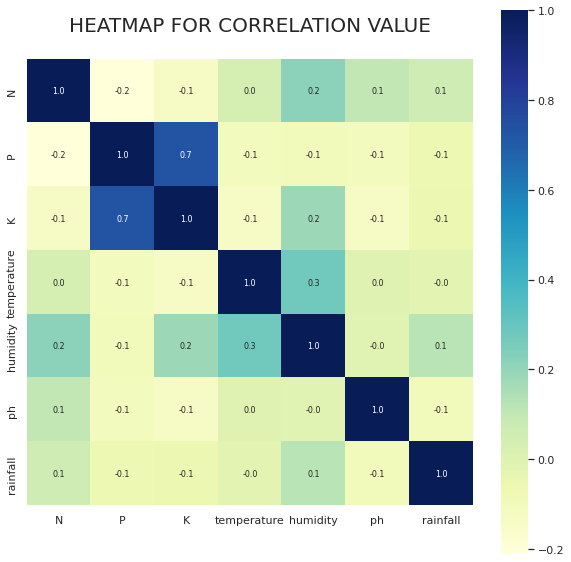

In [127]:
# constructing a beatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='YlGnBu')
title = 'Heatmap for correlation value\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

List of various crops

In [128]:
print("Number of various crops: ", len(crop_reco_dataset['label'].unique()))
print("List of crops: ", crop_reco_dataset['label'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [129]:
# Label column values
crop_reco_dataset['label'].value_counts()

maize          135
chickpea       133
rice           129
banana         128
kidneybeans    120
mango          110
coffee         110
jute           103
mungbean       100
blackgram      100
lentil         100
pomegranate    100
mothbeans      100
pigeonpeas     100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
Name: label, dtype: int64

In [130]:
crop_reco_dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [131]:
crop_reco_dataset.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2363,8,3,0,14.131797,47.225123,4.362608,103.326000,coffee
2364,7,2,4,6.272418,2.127394,4.758793,20.175293,coffee
2365,4,0,3,3.603016,0.396475,4.779833,10.937041,coffee
2366,7,2,0,6.272418,2.127394,4.758793,67.175293,coffee
2367,0,8,3,3.603016,0.396475,4.779833,80.937042,coffee


replace Label data with values

In [132]:
# convert categorical data to numerical values
crop_reco_dataset.replace({'label': {'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4,
                                     'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 
                                     'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 
                                     'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 
                                     'jute': 20, 'coffee': 21, 
                                     },}, inplace=True)

Label Encoding

In [133]:
# encoder = LabelEncoder()

In [134]:
# crop_reco_dataset['label'] = encoder.fit_transform(crop_reco_dataset['label'])

In [135]:
crop_reco_dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0


In [136]:
crop_reco_dataset.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2363,8,3,0,14.131797,47.225123,4.362608,103.326000,21
2364,7,2,4,6.272418,2.127394,4.758793,20.175293,21
2365,4,0,3,3.603016,0.396475,4.779833,10.937041,21
2366,7,2,0,6.272418,2.127394,4.758793,67.175293,21
2367,0,8,3,3.603016,0.396475,4.779833,80.937042,21


In [137]:
# Label column values after level encoding
crop_reco_dataset['label'].value_counts()

1     135
2     133
0     129
10    128
3     120
11    110
21    110
20    103
6     100
7     100
8     100
9     100
5     100
4     100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
Name: label, dtype: int64

In [138]:
# noise = 0.1047*np.random.normal(100,1);
# crop_reco_dataset = crop_reco_dataset + noise

In [139]:
print(crop_reco_dataset)

       N   P   K  temperature   humidity        ph    rainfall  label
0     90  42  43    20.879744  82.002744  6.502985  202.935536      0
1     85  58  41    21.770462  80.319644  7.038096  226.655537      0
2     60  55  44    23.004459  82.320763  7.840207  263.964248      0
3     74  35  40    26.491096  80.158363  6.980401  242.864034      0
4     78  42  42    20.130175  81.604873  7.628473  262.717340      0
...   ..  ..  ..          ...        ...       ...         ...    ...
2363   8   3   0    14.131797  47.225123  4.362608  103.326000     21
2364   7   2   4     6.272418   2.127394  4.758793   20.175293     21
2365   4   0   3     3.603016   0.396475  4.779833   10.937041     21
2366   7   2   0     6.272418   2.127394  4.758793   67.175293     21
2367   0   8   3     3.603016   0.396475  4.779833   80.937042     21

[2368 rows x 8 columns]


Splitting the data set

In [140]:
X = crop_reco_dataset.drop(['label'], axis=1)
Y = crop_reco_dataset['label']

In [141]:
print(X)

       N   P   K  temperature   humidity        ph    rainfall
0     90  42  43    20.879744  82.002744  6.502985  202.935536
1     85  58  41    21.770462  80.319644  7.038096  226.655537
2     60  55  44    23.004459  82.320763  7.840207  263.964248
3     74  35  40    26.491096  80.158363  6.980401  242.864034
4     78  42  42    20.130175  81.604873  7.628473  262.717340
...   ..  ..  ..          ...        ...       ...         ...
2363   8   3   0    14.131797  47.225123  4.362608  103.326000
2364   7   2   4     6.272418   2.127394  4.758793   20.175293
2365   4   0   3     3.603016   0.396475  4.779833   10.937041
2366   7   2   0     6.272418   2.127394  4.758793   67.175293
2367   0   8   3     3.603016   0.396475  4.779833   80.937042

[2368 rows x 7 columns]


In [142]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
2363    21
2364    21
2365    21
2366    21
2367    21
Name: label, Length: 2368, dtype: int64


Splitting the data into Training data & Testing Data

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [144]:
print(X.shape, X_train.shape, X_test.shape)

(2368, 7) (1657, 7) (711, 7)


Machine Learning Model Training

LightGBM Model

In [145]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)

LGBMClassifier()

Training Data

In [146]:
lgb_predictions=lgb_model.predict(X_train)
# Accuracy Score
# accuracy_lgb_on_test_data = accuracy_score(Y_train,lgb_predictions)*100
print('Accuracy Score : ', accuracy_score(Y_train,lgb_predictions)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_train, lgb_predictions))

Accuracy Score :  100.0 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00        75
           4       1.00      1.00      1.00        69
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        78
           7       1.00      1.00      1.00        65
           8       1.00      1.00      1.00        74
           9       1.00      1.00      1.00        72
          10       1.00      1.00      1.00        92
          11       1.00      1.00      1.00        75
          12       1.00      1.00      1.00        69
          13       1.00      1.00      1.00        75
          14       1.00      1.00      1.00        74
          15       1.00      1.00      1.00        66
          16       1.00      1

Testing data

In [147]:
lgb_predictions=lgb_model.predict(X_test)
# Accuracy Score
print('Accuracy Score : ', accuracy_score(Y_test,lgb_predictions)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test, lgb_predictions))

Accuracy Score :  96.62447257383965 

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        39
           1       0.91      0.93      0.92        44
           2       1.00      1.00      1.00        43
           3       1.00      0.98      0.99        45
           4       0.97      1.00      0.98        31
           5       0.91      0.97      0.94        30
           6       1.00      0.91      0.95        22
           7       1.00      1.00      1.00        35
           8       0.96      0.96      0.96        26
           9       1.00      1.00      1.00        28
          10       0.94      0.92      0.93        36
          11       1.00      1.00      1.00        35
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        34
          16      

In [148]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, lgb_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, lgb_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, lgb_predictions))))

Mean_absolute_error:  0.4289732770745429
Mean_squared_error:  7.489451476793249
Root mean_squared_error:  2.7366862218371417


Checking Actual Crop Name and Predicted Crop Name

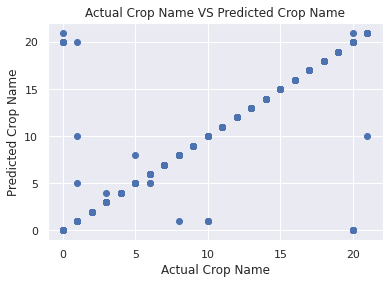

In [149]:
plt.scatter(Y_test, lgb_predictions)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

Random Forest

In [150]:
clf_random_forest=RandomForestClassifier()
clf_random_forest.fit(X_train, Y_train)

RandomForestClassifier()

Train Data

In [151]:
random_forest_text_predictions = clf_random_forest.predict(X_train)
# print('Confusion matrix : \n', confusion_matrix(Y_test,random_forest_text_predictions),'\n')
print('Accuracy Score : ', accuracy_score(Y_train,random_forest_text_predictions)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_train,random_forest_text_predictions))

Accuracy Score :  100.0 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00        75
           4       1.00      1.00      1.00        69
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        78
           7       1.00      1.00      1.00        65
           8       1.00      1.00      1.00        74
           9       1.00      1.00      1.00        72
          10       1.00      1.00      1.00        92
          11       1.00      1.00      1.00        75
          12       1.00      1.00      1.00        69
          13       1.00      1.00      1.00        75
          14       1.00      1.00      1.00        74
          15       1.00      1.00      1.00        66
          16       1.00      1

Test data

In [152]:
random_forest_text_predictions = clf_random_forest.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,random_forest_text_predictions),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,random_forest_text_predictions)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,random_forest_text_predictions))

Accuracy Score :  98.17158931082982 

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.93      0.98      0.96        44
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        31
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        22
           7       1.00      0.97      0.99        35
           8       1.00      1.00      1.00        26
           9       1.00      1.00      1.00        28
          10       1.00      0.89      0.94        36
          11       0.97      1.00      0.99        35
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        34
          16      

In [153]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, random_forest_text_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, random_forest_text_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, random_forest_text_predictions))))

Mean_absolute_error:  0.2348804500703235
Mean_squared_error:  3.939521800281294
Root mean_squared_error:  1.984822863703785


Checking Actual Crop Name and Predicted Crop Name

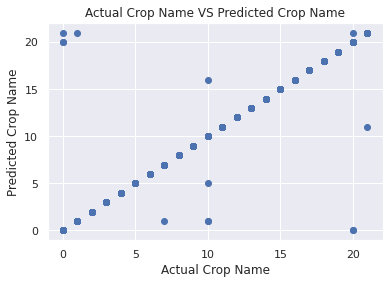

In [154]:
plt.scatter(Y_test, random_forest_text_predictions)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

CatBoostClassifier

In [155]:
cat = CatBoostClassifier()
cat.fit(X_train, Y_train)

Learning rate set to 0.081191
0:	learn: 2.6360989	total: 32.7ms	remaining: 32.7s
1:	learn: 2.3478487	total: 55.9ms	remaining: 27.9s
2:	learn: 2.0540631	total: 78.9ms	remaining: 26.2s
3:	learn: 1.8717202	total: 102ms	remaining: 25.3s
4:	learn: 1.6879542	total: 124ms	remaining: 24.7s
5:	learn: 1.5339202	total: 147ms	remaining: 24.4s
6:	learn: 1.4057286	total: 171ms	remaining: 24.3s
7:	learn: 1.3161008	total: 194ms	remaining: 24.1s
8:	learn: 1.2084264	total: 220ms	remaining: 24.2s
9:	learn: 1.1158295	total: 243ms	remaining: 24.1s
10:	learn: 1.0334879	total: 266ms	remaining: 23.9s
11:	learn: 0.9579049	total: 289ms	remaining: 23.8s
12:	learn: 0.8890085	total: 312ms	remaining: 23.7s
13:	learn: 0.8347111	total: 335ms	remaining: 23.6s
14:	learn: 0.7807794	total: 359ms	remaining: 23.5s
15:	learn: 0.7346137	total: 381ms	remaining: 23.5s
16:	learn: 0.6922707	total: 404ms	remaining: 23.3s
17:	learn: 0.6565376	total: 429ms	remaining: 23.4s
18:	learn: 0.6215210	total: 452ms	remaining: 23.4s
19:	lear

In [156]:
cat_pred = cat.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,cat_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,cat_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,cat_pred))

Accuracy Score :  97.60900140646976 

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        39
           1       0.90      0.98      0.93        44
           2       1.00      1.00      1.00        43
           3       0.98      1.00      0.99        45
           4       0.97      0.97      0.97        31
           5       1.00      0.97      0.98        30
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        35
           8       0.96      1.00      0.98        26
           9       1.00      1.00      1.00        28
          10       1.00      0.89      0.94        36
          11       0.97      1.00      0.99        35
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        34
          16      

In [157]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, cat_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, cat_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, cat_pred))))

Mean_absolute_error:  0.30239099859353025
Mean_squared_error:  5.182841068917019
Root mean_squared_error:  2.2765853967986835


Checking Actual Crop Name and Predicted Crop Name

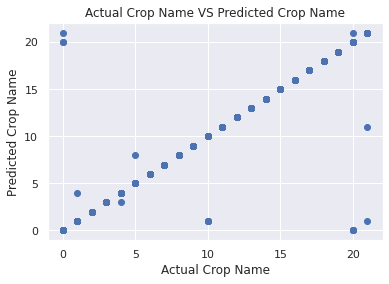

In [158]:
plt.scatter(Y_test, cat_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

XGBClassifier

In [159]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(objective='multi:softprob')

In [160]:
xgb_pred = xgb.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,xgb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,xgb_pred))

Accuracy Score :  96.90576652601969 

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        39
           1       0.95      0.95      0.95        44
           2       1.00      0.98      0.99        43
           3       0.98      0.98      0.98        45
           4       1.00      1.00      1.00        31
           5       0.91      0.97      0.94        30
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        35
           8       0.96      1.00      0.98        26
           9       1.00      1.00      1.00        28
          10       1.00      0.92      0.96        36
          11       1.00      1.00      1.00        35
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        34
          16      

In [161]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, xgb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, xgb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, xgb_pred))))

Mean_absolute_error:  0.44163150492264414
Mean_squared_error:  8.185654008438819
Root mean_squared_error:  2.861058197317702


Checking Actual Crop Name and Predicted Crop Name

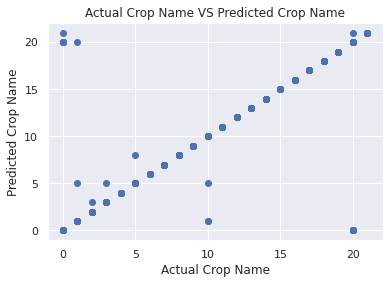

In [162]:
plt.scatter(Y_test, xgb_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

LogisticRegression

In [163]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [164]:
log_reg_pred = log_reg.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,log_reg_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,log_reg_pred))

Accuracy Score :  91.70182841068917 

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.88      0.84      0.86        44
           2       0.96      1.00      0.98        43
           3       1.00      0.93      0.97        45
           4       0.97      1.00      0.98        31
           5       0.96      0.73      0.83        30
           6       0.88      0.95      0.91        22
           7       0.89      0.91      0.90        35
           8       0.93      1.00      0.96        26
           9       1.00      0.93      0.96        28
          10       0.97      0.89      0.93        36
          11       0.91      0.83      0.87        35
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        34
          16      

In [165]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, log_reg_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, log_reg_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, log_reg_pred))))

Mean_absolute_error:  0.8115330520393812
Mean_squared_error:  12.521800281293952
Root mean_squared_error:  3.5386155882341828


Checking Actual Crop Name and Predicted Crop Name

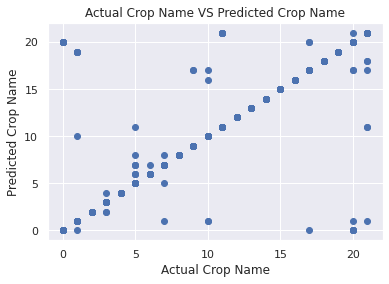

In [166]:
plt.scatter(Y_test, log_reg_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

GaussianNB

In [167]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [168]:
gnb_pred = gnb.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,gnb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,gnb_pred))

Accuracy Score :  97.60900140646976 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        39
           1       0.93      0.95      0.94        44
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        45
           4       0.97      1.00      0.98        31
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        35
           8       1.00      1.00      1.00        26
           9       1.00      1.00      1.00        28
          10       1.00      0.89      0.94        36
          11       0.94      0.97      0.96        35
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        34
          16      

In [169]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, gnb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, gnb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, gnb_pred))))

Mean_absolute_error:  0.32208157524613223
Mean_squared_error:  5.416315049226442
Root mean_squared_error:  2.327297799858549


Checking Actual Crop Name and Predicted Crop Name

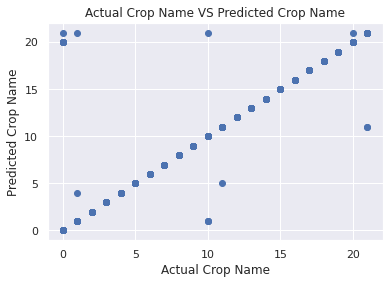

In [170]:
plt.scatter(Y_test, gnb_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

KNeighborsClassifier

In [171]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [172]:
knn_pred = knn.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,knn_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,knn_pred))

Accuracy Score :  95.63994374120956 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.77      0.83        39
           1       0.87      0.91      0.89        44
           2       1.00      1.00      1.00        43
           3       0.98      1.00      0.99        45
           4       1.00      0.97      0.98        31
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        35
           8       0.96      0.96      0.96        26
           9       1.00      1.00      1.00        28
          10       1.00      0.89      0.94        36
          11       0.92      1.00      0.96        35
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        34
          16      

In [173]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, knn_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, knn_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, knn_pred))))

Mean_absolute_error:  0.630098452883263
Mean_squared_error:  11.125175808720112
Root mean_squared_error:  3.3354423707688476


Checking Actual Crop Name and Predicted Crop Name

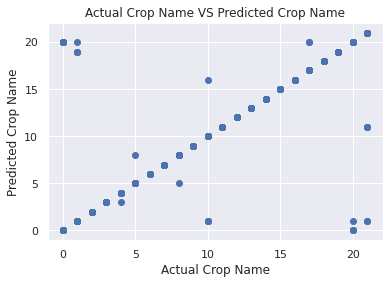

In [174]:
plt.scatter(Y_test, knn_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

DecisionTreeClassifier

In [175]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [176]:
dtc_pred = dtc.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,svc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,dtc_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,dtc_pred))

Accuracy Score :  95.0773558368495 

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        39
           1       0.80      0.93      0.86        44
           2       1.00      1.00      1.00        43
           3       1.00      0.96      0.98        45
           4       1.00      1.00      1.00        31
           5       1.00      0.97      0.98        30
           6       1.00      1.00      1.00        22
           7       1.00      0.97      0.99        35
           8       0.96      1.00      0.98        26
           9       1.00      1.00      1.00        28
          10       1.00      0.83      0.91        36
          11       0.90      1.00      0.95        35
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        34
          16       

In [177]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, dtc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, dtc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, dtc_pred))))

Mean_absolute_error:  0.7454289732770746
Mean_squared_error:  13.414908579465541
Root mean_squared_error:  3.6626368342309807


Checking Actual Crop Name and Predicted Crop Name

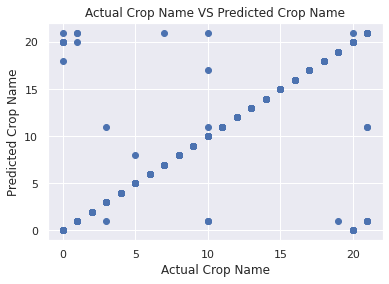

In [178]:
plt.scatter(Y_test, dtc_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

In [179]:
# from sklearn import tree
# text_representation = tree.export_text(dtc)


In [180]:
# fig = plt.figure(figsize=(15,10))
# tree.plot_tree(dtc, filled=True)

Support Vector Clustering (SVC)

In [181]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [182]:
svc_pred = svc.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,svc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,svc_pred))

Accuracy Score :  95.49929676511954 

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.67      0.79        39
           1       0.89      0.91      0.90        44
           2       1.00      1.00      1.00        43
           3       0.94      1.00      0.97        45
           4       1.00      0.90      0.95        31
           5       1.00      0.97      0.98        30
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        35
           8       0.96      1.00      0.98        26
           9       1.00      1.00      1.00        28
          10       1.00      0.89      0.94        36
          11       0.92      1.00      0.96        35
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        34
          16      

In [183]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, svc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, svc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, svc_pred))))

Mean_absolute_error:  0.6526019690576652
Mean_squared_error:  11.673699015471167
Root mean_squared_error:  3.4166795306951405


Checking Actual Crop Name and Predicted Crop Name

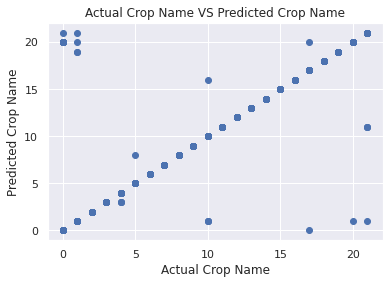

In [184]:
plt.scatter(Y_test, svc_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

In [185]:
print('Accuracy Score : ', accuracy_score(Y_test,lgb_predictions)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,random_forest_text_predictions)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,cat_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,dtc_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')

Accuracy Score :  96.62447257383965 

Accuracy Score :  98.17158931082982 

Accuracy Score :  97.60900140646976 

Accuracy Score :  96.90576652601969 

Accuracy Score :  91.70182841068917 

Accuracy Score :  97.60900140646976 

Accuracy Score :  95.63994374120956 

Accuracy Score :  95.0773558368495 

Accuracy Score :  95.49929676511954 



In [186]:
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [187]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [189]:
import xgboost
import catboost
MLA = [
    #Ensemble Methods
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    catboost.CatBoostClassifier(),

    xgboost.XGBClassifier(),

    lgb.LGBMClassifier(),
    
    #GLM
    linear_model.LogisticRegression(),
    
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),

    #Trees    
    tree.DecisionTreeClassifier(),
    
    ]

In [190]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    # fp, tp, th  = roc_curve(Y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, Y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, Y_test), 4)
    # MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(Y_test, predicted)
    # MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(Y_test, predicted)
    # MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

Learning rate set to 0.081191
0:	learn: 2.6360989	total: 61.4ms	remaining: 1m 1s
1:	learn: 2.3478487	total: 98.1ms	remaining: 49s
2:	learn: 2.0540631	total: 122ms	remaining: 40.6s
3:	learn: 1.8717202	total: 147ms	remaining: 36.6s
4:	learn: 1.6879542	total: 172ms	remaining: 34.3s
5:	learn: 1.5339202	total: 196ms	remaining: 32.4s
6:	learn: 1.4057286	total: 224ms	remaining: 31.7s
7:	learn: 1.3161008	total: 247ms	remaining: 30.7s
8:	learn: 1.2084264	total: 271ms	remaining: 29.8s
9:	learn: 1.1158295	total: 294ms	remaining: 29.1s
10:	learn: 1.0334879	total: 318ms	remaining: 28.6s
11:	learn: 0.9579049	total: 341ms	remaining: 28.1s
12:	learn: 0.8890085	total: 364ms	remaining: 27.7s
13:	learn: 0.8347111	total: 388ms	remaining: 27.3s
14:	learn: 0.7807794	total: 411ms	remaining: 27s
15:	learn: 0.7346137	total: 438ms	remaining: 27s
16:	learn: 0.6922707	total: 462ms	remaining: 26.7s
17:	learn: 0.6565376	total: 485ms	remaining: 26.5s
18:	learn: 0.6215210	total: 508ms	remaining: 26.2s
19:	learn: 0.58

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,MLA Name,MLA Train Accuracy,MLA Test Accuracy
0,RandomForestClassifier,1.0000,0.9789
2,CatBoostClassifier,1.0000,0.9761
6,GaussianNB,0.9855,0.9761
3,XGBClassifier,1.0000,0.9691
4,LGBMClassifier,1.0000,0.9662
7,KNeighborsClassifier,0.9843,0.9564
8,SVC,0.9722,0.9550
9,DecisionTreeClassifier,1.0000,0.9550
5,LogisticRegression,0.9596,0.9170
1,GaussianProcessClassifier,1.0000,0.6329


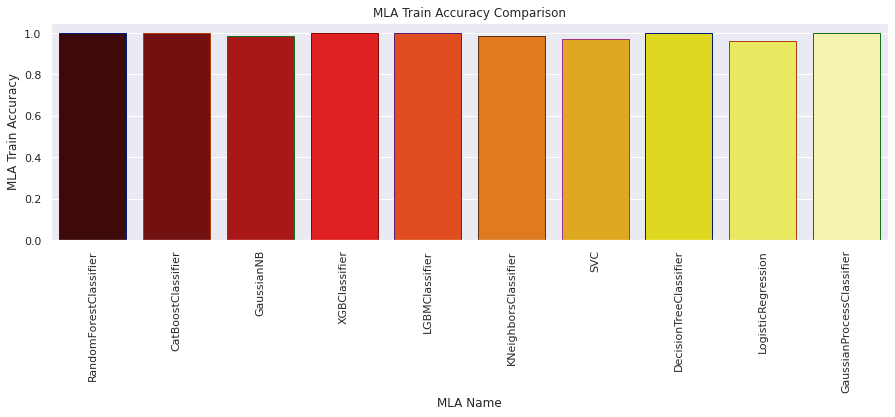

In [191]:
plt.subplots(figsize=(15,4))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

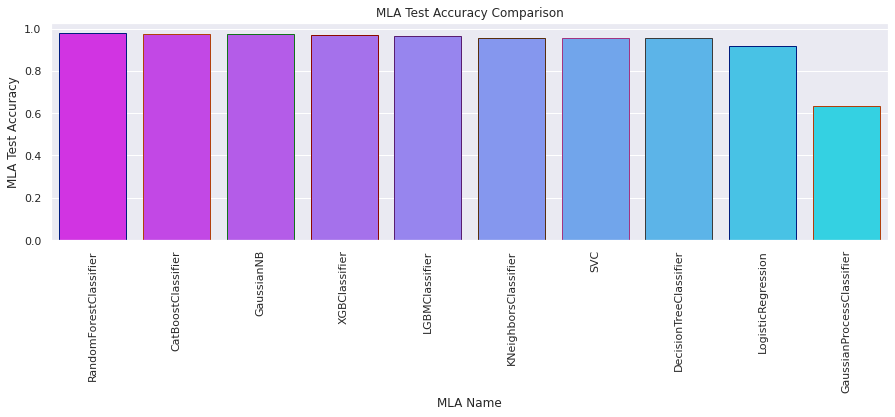

In [192]:
plt.subplots(figsize=(15,4))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='cool_r',edgecolor=sns.color_palette("dark", 8))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()